In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import tsfel as ts
from sklearn.preprocessing import StandardScaler

In [2]:
class_casa = '/home/igor/MEGA/MEGAsync/proj_casas_efic/class_casa.csv'
model_casa_data = pd.read_csv(class_casa)
model_casa_data['House']=model_casa_data['House'].apply(lambda t: str(t)+'_casa')
model_casa_data.rename(columns={'House':'id_casa'},inplace=True)
print(model_casa_data.head())
del class_casa

  id_casa FirstReading LastReading  Cover   HouseType    Facing  Region  RUs  \
0  1_casa   2012-06-01  2015-10-03   1000    bungalow     South     YVR  1.0   
1  2_casa   2016-06-09  2019-11-20    994      duplex     North     YVR  0.0   
2  3_casa   2015-01-27  2018-01-29    987      modern     South     YVR  2.0   
3  4_casa   2015-01-30  2018-01-29    995   character      West     YVR  1.0   
4  5_casa   2015-01-30  2018-01-29    995      modern     South     YVR  1.0   

   EVs   SN                 HVAC  
0  NaN  1.0      FAGF + FPG + HP  
1  NaN  2.0     IFRHG + FPG, NAC  
2  NaN  NaN   IFRHG + 1 BHE, NAC  
3  NaN  NaN    FAGF + IFRHG, NAC  
4  NaN  NaN           IFRHG, NAC  


In [3]:
path_modelo_dia = '/home/igor/MEGA/MEGAsync/proj_casas_efic/mod_heston_dia.csv'
dmodel = pd.read_csv(path_modelo_dia,sep=',')
dmodel = dmodel.merge(model_casa_data.loc[:,['id_casa','HouseType']], on='id_casa', how = 'inner')
del path_modelo_dia
print(dmodel.head())

   id_casa     alpha       eta   vol_bar       vol       cor   HouseType
0  10_casa  0.014778  2.962092  0.209541  1.108769  0.032844     special
1  11_casa  0.007718  6.102342  0.288111  1.376267  0.073679      duplex
2  12_casa  0.009193  0.878324  0.178784  0.658139  0.002035   apartment
3  13_casa  0.035994  5.535556  0.132575  0.713105 -0.035161     special
4  14_casa  0.005350  0.956398  0.255615  1.040196 -0.006314      modern


Importando dados de consumo acumulados por semana

In [4]:
path_dados_semana = '/home/igor/MEGA/MEGAsync/proj_casas_efic/t_dados_dia.csv'
datadmodel = pd.read_csv(path_dados_semana,sep=',')
datadmodel = datadmodel.merge(model_casa_data.loc[:,['id_casa','HouseType']], on='id_casa', how = 'inner')

tsfel para cada dominio da biblioteca e padronização das saídas

In [5]:
scaler = StandardScaler()
cfg = ts.get_features_by_domain("statistical")
dstat = pd.DataFrame()
casa = []
for i,df in datadmodel.groupby('id_casa'):
    X = ts.time_series_features_extractor(cfg, df['energy_kWh'].values)
    casa.append(i)
    dstat= dstat.append(X)
del X

dstat.dropna(axis=1,inplace=True)
cf=ts.correlated_features(dstat)
dstat.drop(labels=cf, axis=1, inplace=True)
scaler.fit(dstat)
dstat = scaler.transform(dstat)


cfg = ts.get_features_by_domain("temporal")
dtemp = pd.DataFrame()
for i,df in datadmodel.groupby('id_casa'):
    X = ts.time_series_features_extractor(cfg, df['energy_kWh'].values)
    dtemp= dtemp.append(X)
del X
dtemp.dropna(axis=1,inplace=True)
cf=ts.correlated_features(dtemp)
dtemp.drop(labels=cf, axis=1, inplace=True)
scaler.fit(dtemp)
dstat = scaler.transform(dtemp)

cfg = ts.get_features_by_domain("spectral")
dspec = pd.DataFrame()
for i,df in datadmodel.groupby('id_casa'):
    X = ts.time_series_features_extractor(cfg, df['energy_kWh'].values)
    dspec= dspec.append(X)
del X
dspec.dropna(axis=1,inplace=True)
cf=ts.correlated_features(dspec)
dspec.drop(labels=cf, axis=1, inplace=True)
scaler.fit(dspec)
dspec = scaler.transform(dspec)

*** Feature extraction started ***
16


<ipython-input-5-317a76ed089a>:6: UserWarning: Using default sampling frequency set in configuration file.
  X = ts.time_series_features_extractor(cfg, df['energy_kWh'].values)


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
16


*** Feature extraction started ***
18


<ipython-input-5-317a76ed089a>:21: UserWarning: Using default sampling frequency set in configuration file.
  X = ts.time_series_features_extractor(cfg, df['energy_kWh'].values)


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
18


*** Feature extraction started ***
26


<ipython-input-5-317a76ed089a>:33: UserWarning: Using default sampling frequency set in configuration file.
  X = ts.time_series_features_extractor(cfg, df['energy_kWh'].values)


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


*** Feature extraction started ***
26


Testando pca para cada domínio de forma indenpendete

<AxesSubplot:xlabel='pca1_stat', ylabel='pca2_stat'>

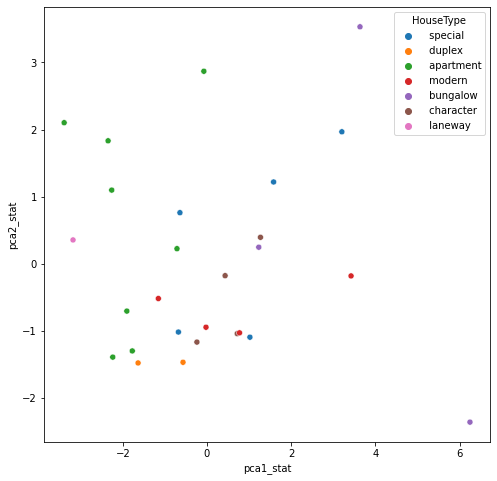

In [6]:
dpc = pd.DataFrame()
pca = PCA(n_components=2)
pca.fit(dstat)
pca_data = pca.fit_transform(dstat)
dpc['id_casa'] = casa
dpc = dpc.merge(model_casa_data.loc[:,['id_casa','HouseType']], on='id_casa', how = 'inner')
dpc['pca1_stat']=pca_data[:,0]
dpc['pca2_stat']=pca_data[:,1]
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='pca1_stat',y='pca2_stat',data=dpc, hue='HouseType',ax=ax)

<AxesSubplot:xlabel='pca1_temp', ylabel='pca2_temp'>

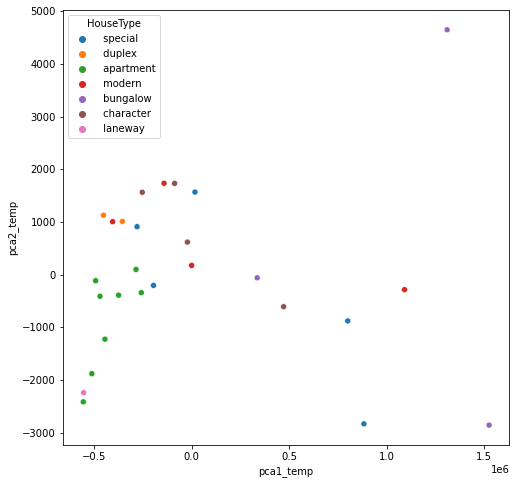

In [7]:
pca.fit(dtemp)
pca_data = pca.fit_transform(dtemp)
dpc['pca1_temp']=pca_data[:,0]
dpc['pca2_temp']=pca_data[:,1]
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='pca1_temp',y='pca2_temp',data=dpc, hue='HouseType',ax=ax)

<AxesSubplot:xlabel='pca1_spec', ylabel='pca2_spec'>

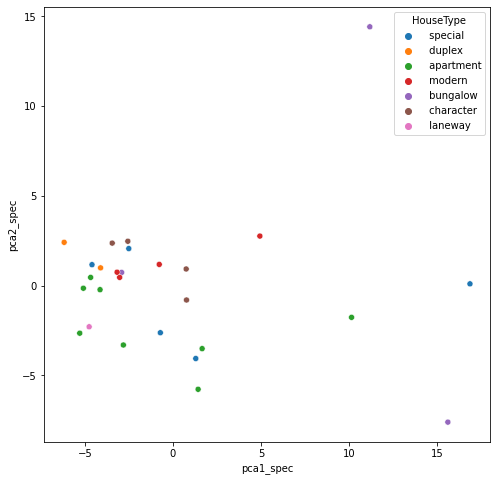

In [8]:
pca.fit(dspec)
pca_data = pca.fit_transform(dspec)
dpc['pca1_spec']=pca_data[:,0]
dpc['pca2_spec']=pca_data[:,1]
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='pca1_spec',y='pca2_spec',data=dpc, hue='HouseType',ax=ax)

<AxesSubplot:xlabel='pca1_heston', ylabel='pca2_heston'>

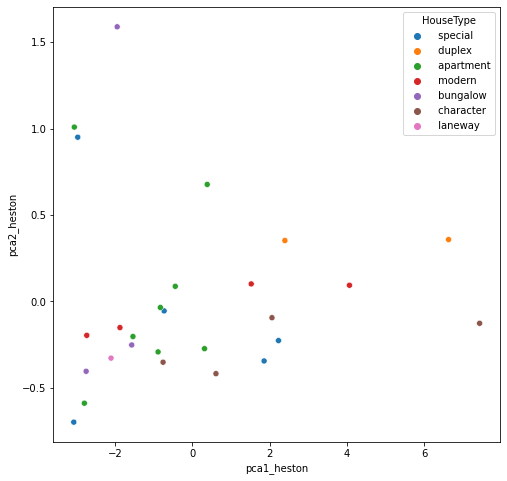

In [9]:
pca.fit(dmodel.loc[:,['alpha','eta','vol_bar','vol','cor']])
pca_data = pca.fit_transform(dmodel.loc[:,['alpha','eta','vol_bar','vol','cor']])
dpc['pca1_heston']=pca_data[:,0]
dpc['pca2_heston']=pca_data[:,1]
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='pca1_heston',y='pca2_heston',data=dpc, hue='HouseType',ax=ax)

Assim que levantar irei plotar cada elemento num único plano e calcular a distância entre as figuras geradas